#**Import Packages**

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import  Button, Slider
from scipy.stats import logistic

# **Integrate and Fire Model**

In [ ]:


#==============================================================================#

def IF(_I=0.025, Es=-0.080):

    ######### Constants
    El      =   -0.070                      # restint membrane potential [V]
    thresh  =   -0.054                      # spiking threshold [V]
    tau_m   =    0.020                      
    Rm      =    1                          # I=25 mA and IR=25 mV --> R=1 (Ohms)
    rm      =    0.100
    tau_peak=    0.010
    

    ######### Experimental Setup
    # TIME
    T       =   0.7                          # total simulation length [s]
    dt      =   0.00001                     # step size [s]
    time    =   np.arange(0, T+dt, dt)      # step values [s]
    # VOLTAGE
    V       =   np.empty(len(time))         # array for saving Voltage history
    V[0]    =   El                          # set initial to resting potential
    # CURRENT
    I = np.zeros(len(time))
    I[1000:] = _I
    ######### Measurements
    spikes  =   0                           # counter for number of spikes

    ######### Kernel
    k=np.zeros(len(time))
    ######### Impulse Train
    p=[0,1]*int(len(time)/2)
    if len(p)<len(time):
      for r in range(0,len(time)-len(p)):
        p.append(0)
    ######### Simulation
    for i in range(1, len(time)):
        t=i*dt
        Kt=(t/tau_peak)*math.exp(1-t/tau_peak)
        k[i]=Kt*dt
        g=0
        for j in range(0,i):
          g=g+p[j]*k[i-j]

        # use "dV/dT=(-(V-El)-g(V-Es)rm+IRm)/tau_m" to get this equation
        dV =  (Rm*I[i] - (V[i-1]-El) - rm*g*(V[i-1]-Es))/tau_m
        V[i] = V[i-1] + dV*dt

        # in case we exceed threshold
        if V[i] > thresh:
            V[i-1] =  0.000       # set the last step to spike value
            V[i]   = -0.080       # current step is resting membrane potential
            spikes += 1     # count spike

    return V

def I_values(_I=0.025, time=None):
    I = np.zeros(len(time))
    I[1000:] = _I
    return I

#==============================================================================#

def start_IF_sim(Mode):
    # time parameters for plotting
    T       =   0.7                           # total simulation length [s]
    dt      =   0.00001                       # step size [s]
    time    =   np.arange(0, T+dt, dt)        # step values [s]

    # initial parameters
    I_init      =    0.025
    Es_inh      =   -0.080
    Es_exc      =    0.000
    # Mode
    if Mode=='Inhibitory':
      Es_init=Es_inh
      Title='Inhibitory Synapse'
    if Mode=='Excitatory':
      Es_init=Es_exc
      Title='Excitatory Synapse'

    # update functions for lines
    V = IF(_I=I_init, Es=Es_init)
    I = I_values(_I=I_init, time=time)

    ######### Plotting
    axis_color = 'lightgoldenrodyellow'

    fig = plt.figure(Title , figsize=(14, 7))
    ax = fig.add_subplot(111)
    plt.title( Title )
    fig.subplots_adjust(left=0.1, bottom=0.32)

    # plot lines
    line = plt.plot(time*1000, V*1000,color='b', label="Membrane Potential")[0]
    line2 = plt.plot(time*1000, I*1000,color='r', label="Applied Current")[0]

    # add legend
    plt.legend(loc="upper right")

    # add axis labels
    plt.ylabel("Potential [mV]/ Current [mA]")
    plt.xlabel("Time [ms]")
    plt.grid()

    # define sliders (position, color, inital value, parameter, etc...)
    I_slider_axis = plt.axes([0.1, 0.17, 0.65, 0.03], facecolor=axis_color)
    I_slider = Slider(I_slider_axis, '$I_{ext}$', -0.01, 0.03, valinit=I_init)



    # update functions
    def update(val):
        line.set_ydata(IF(I_slider.val))
        line2.set_ydata(I_values(I_slider.val, time=time))

    # update, if any slider is moved
    I_slider.on_changed(update)

    # Add a button for resetting the parameters
    reset_button_ax = plt.axes([0.8, 0.02, 0.1, 0.04])
    reset_button = Button(
        reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')

    # event of resert button being clicked
    def reset_button_was_clicked(event):
        I_slider.reset()

    reset_button.on_clicked(reset_button_was_clicked)

    plt.show()


#==============================================================================#

#if (__name__ == '__main__'):
#    start_IF_sim()


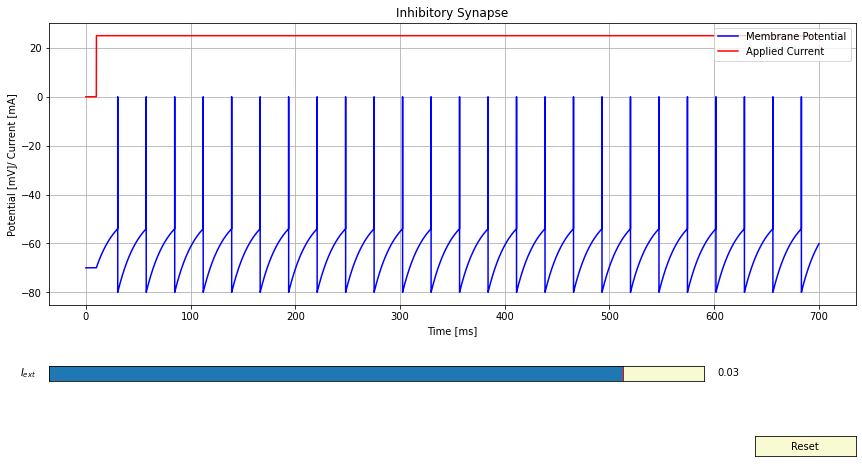

In [ ]:
 start_IF_sim(Mode='Inhibitory')

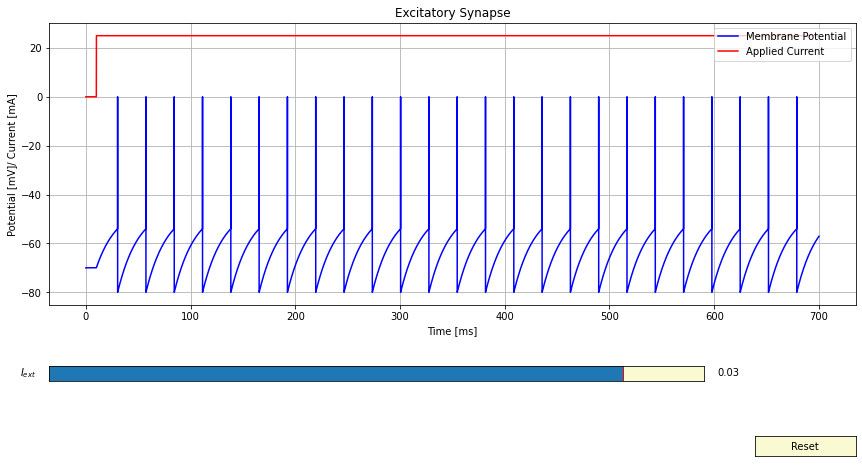

In [ ]:
start_IF_sim(Mode='Excitatory')

# **Changing in Periodic Impulse Train** 

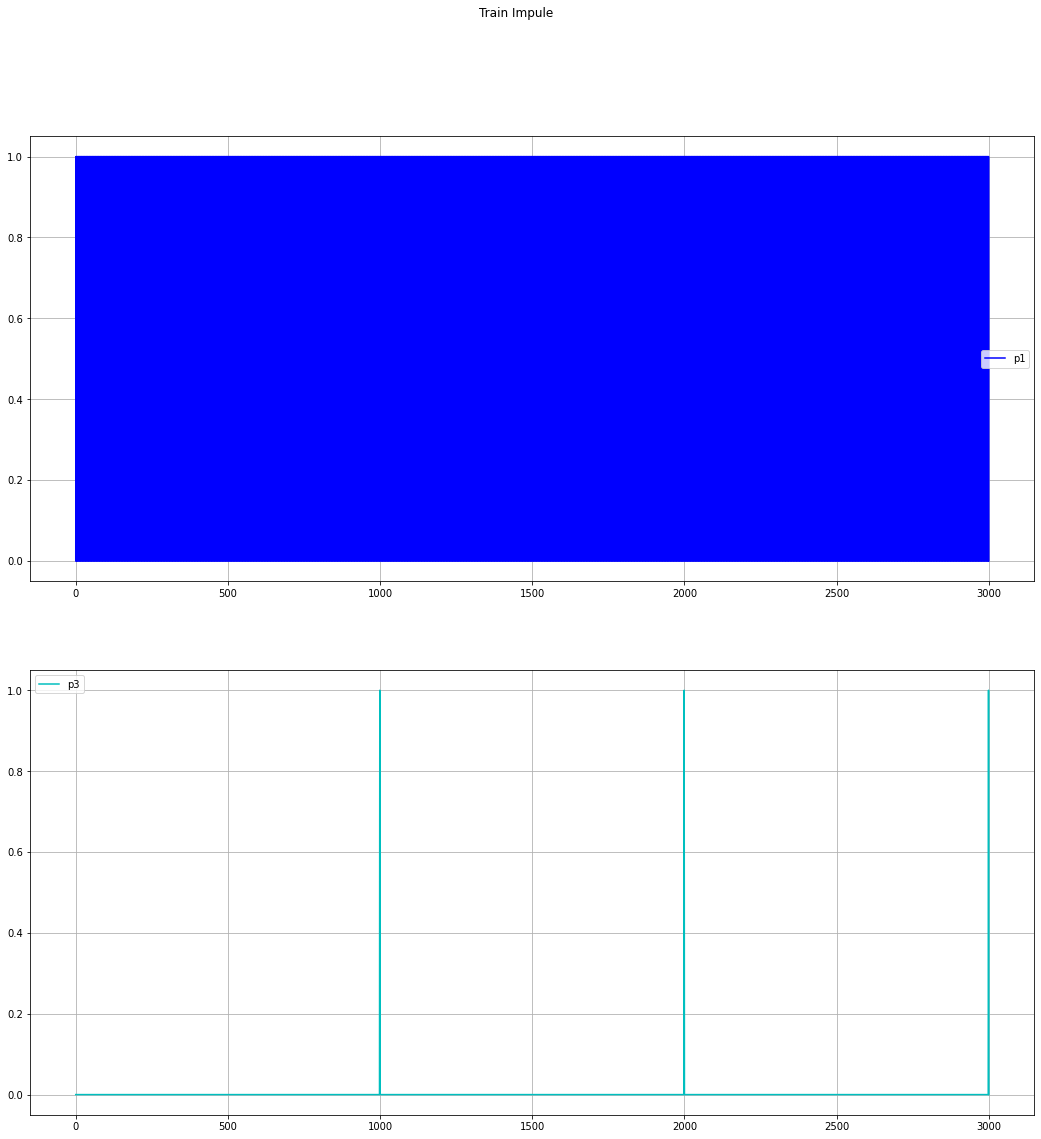

In [2]:

T       =   0.7                          
dt      =   0.00001                     
time    =   np.arange(0, T+dt, dt)      
                        
######### Impulse Train
# p2=[0,0,0,1]*int(len(time)/4)
# if len(p2)<len(time):
#   for r in range(0,len(time)-len(p2)):
#     p2.append(0)
p1=[0,1]*int(len(time)/2)
if len(p1)<len(time):
  for r in range(0,len(time)-len(p1)):
    p1.append(0)
p3=[0]*999
p3.append(1)
p3=p3*int(len(time)/1000)
if len(p3)<len(time):
  for r in range(0,len(time)-len(p3)):
    p3.append(0)
     

fig, axs=plt.subplots((2),figsize=(18,18))
fig.suptitle('Train Impule')
axs[0].plot(time[:3001]*100000,p1[:3001],color='b',label='p1')
#axs[1].plot(time[:50]*100000,p2[:50],color='m',label='p2')
axs[1].plot(time[:3001]*100000,p3[:3001],color='c',label='p3')

axs[0].legend()
axs[0].grid()
axs[1].legend()
axs[1].grid()

In [ ]:


#==============================================================================#

def IF(_I=0.025, Es=-0.080):

    ######### Constants
    El      =   -0.070                      # restint membrane potential [V]
    thresh  =   -0.054                      # spiking threshold [V]
    tau_m   =    0.020                      
    Rm      =    1                          # I=25 mA and IR=25 mV --> R=1 (Ohms)
    rm      =    0.100
    tau_peak=    0.010
    

    ######### Experimental Setup
    # TIME
    T       =   0.7                          # total simulation length [s]
    dt      =   0.00001                     # step size [s]
    time    =   np.arange(0, T+dt, dt)      # step values [s]
    # VOLTAGE
    V1       =   np.empty(len(time))         # array for saving Voltage history
    V1[0]    =   El                          # set initial to resting potential
    V2       =   np.empty(len(time))         # array for saving Voltage history
    V2[0]    =   El                          # set initial to resting potential
    # CURRENT
    I = np.zeros(len(time))
    I[1000:] = _I
    ######### Measurements
    spikes  =   0                           # counter for number of spikes

    ######### Kernel
    k=np.zeros(len(time))
    ######### Impulse Train
    p1=[0,100]*int(len(time)/2)
    if len(p1)<len(time):
      for r in range(0,len(time)-len(p1)):
        p1.append(0)
    p2=[0]*999
    p2.append(100)
    p2=p2*int(len(time)/1000)
    if len(p2)<len(time):
      for r in range(0,len(time)-len(p2)):
        p2.append(0)
    ######### Simulation
    for i in range(1, len(time)):
        t=i*dt
        Kt=(t/tau_peak)*math.exp(1-t/tau_peak)
        k[i]=Kt*dt
        g1=0
        g2=0
        for j in range(0,i):
          g1=g1+p1[j]*k[i-j]
          g2=g2+p2[j]*k[i-j]
    



        # use "dV/dT=(-(V-El)-g(V-Es)rm+IRm)/tau_m" to get this equation
        dV1 =  (Rm*I[i] - (V1[i-1]-El) - rm*g1*(V1[i-1]-Es))/tau_m
        V1[i] = V1[i-1] + dV1*dt
        dV2 =  (Rm*I[i] - (V2[i-1]-El) - rm*g2*(V2[i-1]-Es))/tau_m
        V2[i] = V2[i-1] + dV2*dt
      

        # in case we exceed threshold
        if V1[i] > thresh:
            V1[i-1] =  0.000       # set the last step to spike value
            V1[i]   = -0.080       # current step is resting membrane potential
            spikes += 1     # count spike
        if V2[i] > thresh:
            V2[i-1] =  0.000       # set the last step to spike value
            V2[i]   = -0.080       # current step is resting membrane potential
            spikes += 1     # count spike

    return V1,V2

def I_values(_I=0.025, time=None):
    I = np.zeros(len(time))
    I[1000:] = _I
    return I

#==============================================================================#

def start_IF_sim(Mode):
    # time parameters for plotting
    T       =   0.7                           # total simulation length [s]
    dt      =   0.00001                       # step size [s]
    time    =   np.arange(0, T+dt, dt)        # step values [s]

    # initial parameters
    I_init      =    0.025
    Es_inh      =   -0.080
    Es_exc      =    0.000
    # Mode
    if Mode=='Inhibitory':
      Es_init=Es_inh
      Title='Inhibitory Synapse'
    if Mode=='Excitatory':
      Es_init=Es_exc
      Title='Excitatory Synapse'

    # update functions for lines
    V1,V2 = IF(_I=I_init, Es=Es_init)
    I = I_values(_I=I_init, time=time)

    ######### Plotting
    axis_color = 'lightgoldenrodyellow'

    fig = plt.figure(Title , figsize=(14, 7))
    ax = fig.add_subplot(111)
    plt.title( Title )
    fig.subplots_adjust(left=0.1, bottom=0.32)

    # plot lines
    line = plt.plot(time*1000, V1*1000,color='b', label="Membrane Potential (T=2)")[0]
    line3= plt.plot(time*1000, V2*1000,color='m', label="Membrane Potential (T=1000)")[0]
    

    line2 = plt.plot(time*1000, I*1000,color='r', label="Applied Current")[0]

    # add legend
    plt.legend(loc="upper right")

    # add axis labels
    plt.ylabel("Potential [mV]/ Current [mA]")
    plt.xlabel("Time [ms]")
    plt.grid()

    # define sliders (position, color, inital value, parameter, etc...)
    I_slider_axis = plt.axes([0.1, 0.17, 0.65, 0.03], facecolor=axis_color)
    I_slider = Slider(I_slider_axis, '$I_{ext}$', -0.01, 0.03, valinit=I_init)



    # update functions
    def update(val):
        line.set_ydata(IF(I_slider.val))
        line2.set_ydata(I_values(I_slider.val, time=time))

    # update, if any slider is moved
    I_slider.on_changed(update)

    # Add a button for resetting the parameters
    reset_button_ax = plt.axes([0.8, 0.02, 0.1, 0.04])
    reset_button = Button(
        reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')

    # event of resert button being clicked
    def reset_button_was_clicked(event):
        I_slider.reset()

    reset_button.on_clicked(reset_button_was_clicked)

    plt.show()


#==============================================================================#

#if (__name__ == '__main__'):
#    start_IF_sim()


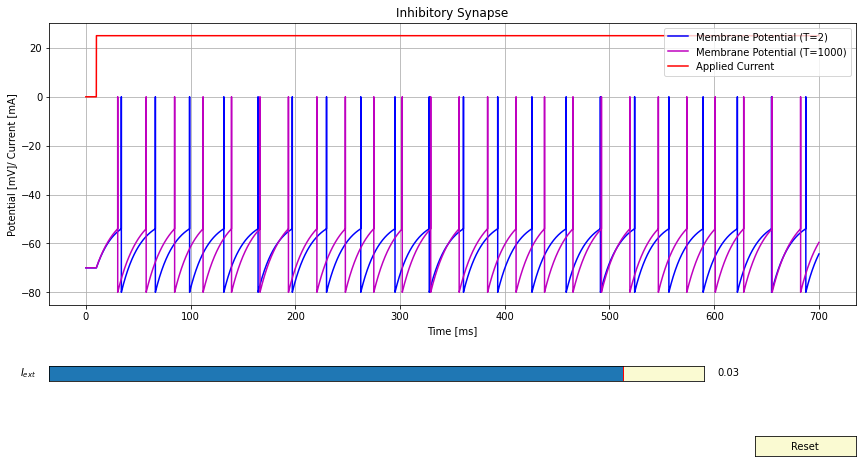

In [ ]:
start_IF_sim(Mode='Inhibitory')

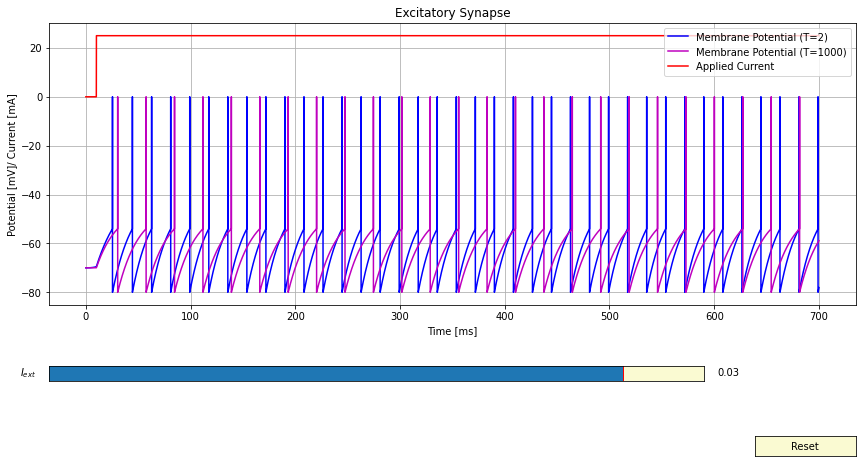

In [ ]:
start_IF_sim(Mode='Excitatory')

# **Changing Initial Potential**

In [3]:


#==============================================================================#

def IF(_I=0.025, Es=-0.080):

    ######### Constants
    El      =   -0.070                      # restint membrane potential [V]
    thresh  =   -0.054                      # spiking threshold [V]
    tau_m   =    0.020                      
    Rm      =    1                          # I=25 mA and IR=25 mV --> R=1 (Ohms)
    rm      =    0.100
    tau_peak=    0.010
    

    ######### Experimental Setup
    # TIME
    T       =   0.5                          # total simulation length [s]
    dt      =   0.00001                     # step size [s]
    time    =   np.arange(0, T+dt, dt)      # step values [s]
    # VOLTAGE
    V1       =   np.empty(len(time))         # array for saving Voltage history
    V1[0]    =   -0.070                          # set initial to resting potential
    V2       =   np.empty(len(time))         # array for saving Voltage history
    V2[0]    =   -0.050                         # set initial to resting potential
    V3       =   np.empty(len(time))         # array for saving Voltage history
    V3[0]    =   -0.100                         # set initial to resting potential
    # CURRENT
    I = np.zeros(len(time))
    I[1000:] = _I
    ######### Measurements
    spikes  =   0                           # counter for number of spikes

    ######### Kernel
    k=np.zeros(len(time))
    ######### Impulse Train
    p1=[0,100]*int(len(time)/2)
    if len(p1)<len(time):
      for r in range(0,len(time)-len(p1)):
        p1.append(0)
    ######### Simulation
    for i in range(1, len(time)):
        t=i*dt
        Kt=(t/tau_peak)*math.exp(1-t/tau_peak)
        k[i]=Kt*dt
        g1=0
        for j in range(0,i):
          g1=g1+p1[j]*k[i-j]
    



        # use "dV/dT=(-(V-El)-g(V-Es)rm+IRm)/tau_m" to get this equation
        dV1 =  (Rm*I[i] - (V1[i-1]-El) - rm*g1*(V1[i-1]-Es))/tau_m
        V1[i] = V1[i-1] + dV1*dt
        dV2 =  (Rm*I[i] - (V2[i-1]-El) - rm*g1*(V2[i-1]-Es))/tau_m
        V2[i] = V2[i-1] + dV2*dt
        dV3 =  (Rm*I[i] - (V3[i-1]-El) - rm*g1*(V3[i-1]-Es))/tau_m
        V3[i] = V3[i-1] + dV3*dt

        # in case we exceed threshold
        if V1[i] > thresh:
            V1[i-1] =  0.000       # set the last step to spike value
            V1[i]   = -0.080       # current step is resting membrane potential
            spikes += 1     # count spike
        if V2[i] > thresh:
            V2[i-1] =  0.000       # set the last step to spike value
            V2[i]   = -0.080       # current step is resting membrane potential
            spikes += 1     # count spike
        if V3[i] > thresh:
            V3[i-1] =  0.000       # set the last step to spike value
            V3[i]   = -0.080       # current step is resting membrane potential
            spikes += 1     # count spike

    return V1,V2,V3

def I_values(_I=0.025, time=None):
    I = np.zeros(len(time))
    I[1000:] = _I
    return I

#==============================================================================#

def start_IF_sim(Mode):
    # time parameters for plotting
    T       =   0.5                           # total simulation length [s]
    dt      =   0.00001                       # step size [s]
    time    =   np.arange(0, T+dt, dt)        # step values [s]

    # initial parameters
    I_init      =    0.025
    Es_inh      =   -0.080
    Es_exc      =    0.000
    # Mode
    if Mode=='Inhibitory':
      Es_init=Es_inh
      Title='Inhibitory Synapse'
    if Mode=='Excitatory':
      Es_init=Es_exc
      Title='Excitatory Synapse'

    # update functions for lines
    V1,V2,V3 = IF(_I=I_init, Es=Es_init)
    I = I_values(_I=I_init, time=time)

    ######### Plotting
    axis_color = 'lightgoldenrodyellow'

    fig = plt.figure(Title , figsize=(14, 7))
    ax = fig.add_subplot(111)
    plt.title( Title )
    fig.subplots_adjust(left=0.1, bottom=0.32)

    # plot lines
    line = plt.plot(time*1000, V1*1000,color='b', label="Membrane Potential (v0=-70mv)")[0]
    line3= plt.plot(time*1000, V2*1000,color='m', label="Membrane Potential (v0=-50mv)")[0]
    line4= plt.plot(time*1000, V3*1000,color='c', label="Membrane Potential (v0=-100mv)")[0]

    line2 = plt.plot(time*1000, I*1000,color='r', label="Applied Current")[0]

    # add legend
    plt.legend(loc="upper right")

    # add axis labels
    plt.ylabel("Potential [mV]/ Current [mA]")
    plt.xlabel("Time [ms]")
    plt.grid()

    # define sliders (position, color, inital value, parameter, etc...)
    I_slider_axis = plt.axes([0.1, 0.17, 0.65, 0.03], facecolor=axis_color)
    I_slider = Slider(I_slider_axis, '$I_{ext}$', -0.01, 0.03, valinit=I_init)



    # update functions
    def update(val):
        line.set_ydata(IF(I_slider.val))
        line2.set_ydata(I_values(I_slider.val, time=time))

    # update, if any slider is moved
    I_slider.on_changed(update)

    # Add a button for resetting the parameters
    reset_button_ax = plt.axes([0.8, 0.02, 0.1, 0.04])
    reset_button = Button(
        reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')

    # event of resert button being clicked
    def reset_button_was_clicked(event):
        I_slider.reset()

    reset_button.on_clicked(reset_button_was_clicked)

    plt.show()


#==============================================================================#

#if (__name__ == '__main__'):
#    start_IF_sim()


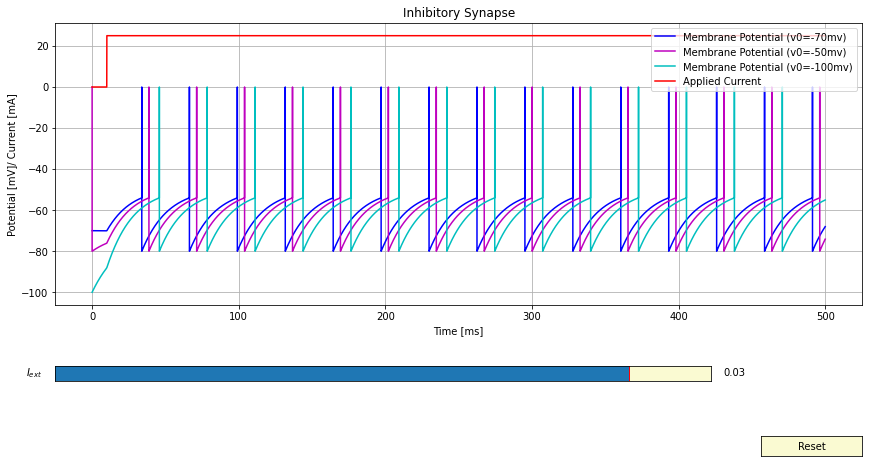

In [6]:
start_IF_sim(Mode='Inhibitory')

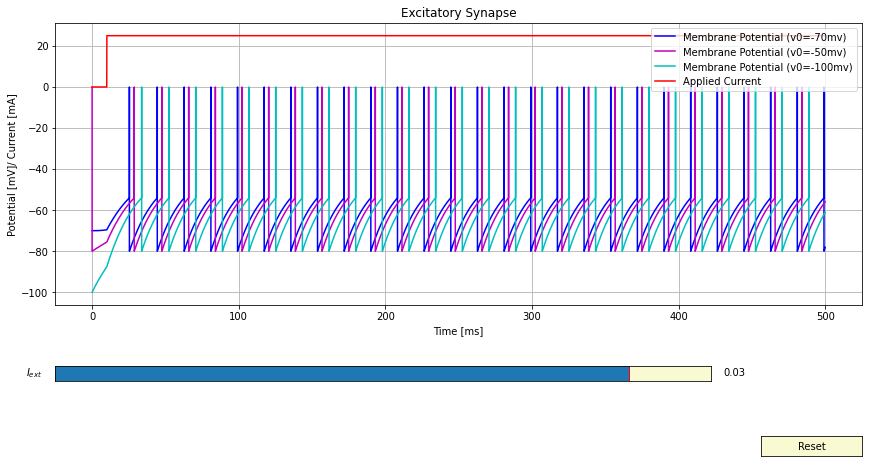

In [7]:
start_IF_sim(Mode='Excitatory')

# **Two-neuron network**

In [8]:
# Inhabitory Synapses 
#==============================================================================#
def two_neurons(_I=0.025, Es=-0.080):

    ######### Constants
    El      =   -0.070                      # restint membrane potential [V]
    thresh  =   -0.054                      # spiking threshold [V]
    tau_m   =    0.020                      
    Rm      =    1                          # I=25 mA and IR=25 mV --> R=1 (Ohms)
    rm      =    0.100
    tau_peak=    0.010
    

    ######### Experimental Setup
    # TIME
    T       =   0.5                               # total simulation length [s]
    dt      =   0.00001                            # step size [s]
    time    =   np.arange(0, T+dt, dt)            # step values [s]
    # VOLTAGE
    V1       =   np.empty(len(time))            # array for saving Voltage history of First Neuron 
    V1[0]    =   -0.080                         # set initial to resting potential of First Neuron
    V2       =   np.empty(len(time))            # array for saving Voltage history of Second Neuron
    V2[0]    =   -0.060                         # set initial to resting potential of Second Neuron

    # CURRENT
    I = np.zeros(len(time))
    I[1000:] = _I
    ######### Measurements
    spikes  =   0                           # counter for number of spikes

    ######### Kernel
    k1=np.zeros(len(time))
    k2=np.zeros(len(time))
    ######### Impulse Train
    p1=np.zeros(len(time))
    p2=np.zeros(len(time))
    ############
    g1=0
    g2=0
    
    ######### Simulation
    for i in range(1, len(time)):

        #*********First Neuron***********
        t_=i*dt #[s]
        Kt1=(t_/tau_peak)*math.exp(1-t_/tau_peak)
        k1[i]=Kt1*dt
        for j in range(0,i):
          g1=g1+p2[j]*k1[i-j]
        #print(g1)
        # use "dV/dT=(-(V-El)-g(V-Es)rm+IRm)/tau_m" to get this equation
        dV1 =  (Rm*I[i] - (V1[i-1]-El) - rm*g1*(V1[i-1]-Es))/tau_m
        #print(Rm*I[i] - (V1[i-1]-El))
        #print(rm*g1*(V1[i-1]-Es))
        #print(dV1)
        #print('*')
        V1[i] = V1[i-1] + dV1*dt

        # in case we exceed threshold
        if V1[i] > thresh:
            V1[i-1] =  0.000          # set the last step to spike value
            V1[i]   = -0.080          # current step is resting membrane potential
            spikes += 1               # count spike
            #print('n1')
            #print(i)
            p1[i-1]=1                # Updating spiking rate of First Neuron
        
        #*********Second Neuron***********

        Kt2=(t_/tau_peak)*math.exp(1-t_/tau_peak)
        k2[i]=Kt2*dt
        for j in range(0,i):
          g2=g2+p1[j]*k2[i-j]
        # use "dV/dT=(-(V-El)-g(V-Es)rm+IRm)/tau_m" to get this equation
        dV2 =  (Rm*I[i] - (V2[i-1]-El) - rm*g2*(V2[i-1]-Es))/tau_m
        V2[i] = V2[i-1] + dV2*dt

        # in case we exceed threshold
        if V2[i] > thresh:
            V2[i-1] =  0.000       # set the last step to spike value
            V2[i]   = -0.080       # current step is resting membrane potential
            spikes += 1            # count spike
            #print('n2')
            #print(i)
            p2[i-1]=1                # Updating spiking rate of First Neuron

        

    return V1,V2

def I_values(_I=0.025, time=None):
    I = np.zeros(len(time))
    I[1000:] = _I
    return I

#==============================================================================#

def start_two_neurons_sim(Mode='Inhibitory'):
    # time parameters for plotting
    T       =   0.5                         # total simulation length [s]
    dt      =   0.00001                     # step size [s]
    time    =   np.arange(0, T+dt, dt)      # step values [s]

    # initial parameters
    I_init      =    0.025
    Es_inh      =   -0.080
    Es_exc      =    0.000
    # Mode
    if Mode=='Inhibitory':
      Es_init=Es_inh
      Title='Inhibitory Synapse'
    if Mode=='Excitatory':
      Es_init=Es_exc
      Title='Excitatory Synapse'

    # update functions for lines
    V1,V2 = two_neurons(_I=I_init, Es=Es_init)
    I = I_values(_I=I_init, time=time)

    ######### Plotting
    axis_color = 'lightgoldenrodyellow'

    fig = plt.figure(Title, figsize=(14, 7))
    ax = fig.add_subplot(111)
    plt.title( Title)
    fig.subplots_adjust(left=0.1, bottom=0.32)

    # plot lines
    line1 = plt.plot(time*1000, V1*1000,color='b', label="Membrane Potential Neuron 1")[0]
    line2= plt.plot(time*1000, V2*1000,color='r', label="Membrane Potential Neuron 2")[0]
    line3 = plt.plot(time*1000, I*1000,color='k', label="Applied Current")[0]

    # add legend
    plt.legend(loc="upper right")

    # add axis labels
    plt.ylabel("Potential [mV]/ Current [mA]")
    plt.xlabel("Time [ms]")
    plt.grid()

    # define sliders (position, color, inital value, parameter, etc...)
    I_slider_axis = plt.axes([0.1, 0.17, 0.65, 0.03], facecolor=axis_color)
    I_slider = Slider(I_slider_axis, '$I_{ext}$', -0.01, 0.03, valinit=I_init)



    # update functions
    def update(val):
        line1.set_ydata(two_neurons(I_slider.val))
        line2.set_ydata(two_neurons(I_slider.val))
        line3.set_ydata(I_values(I_slider.val, time=time))

    # update, if any slider is moved
    I_slider.on_changed(update)

    # Add a button for resetting the parameters
    reset_button_ax = plt.axes([0.8, 0.02, 0.1, 0.04])
    reset_button = Button(
        reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')

    # event of resert button being clicked
    def reset_button_was_clicked(event):
        I_slider.reset()

    reset_button.on_clicked(reset_button_was_clicked)

    plt.show()


#==============================================================================#

#if (__name__ == '__main__'):
  #  start_IF_sim()


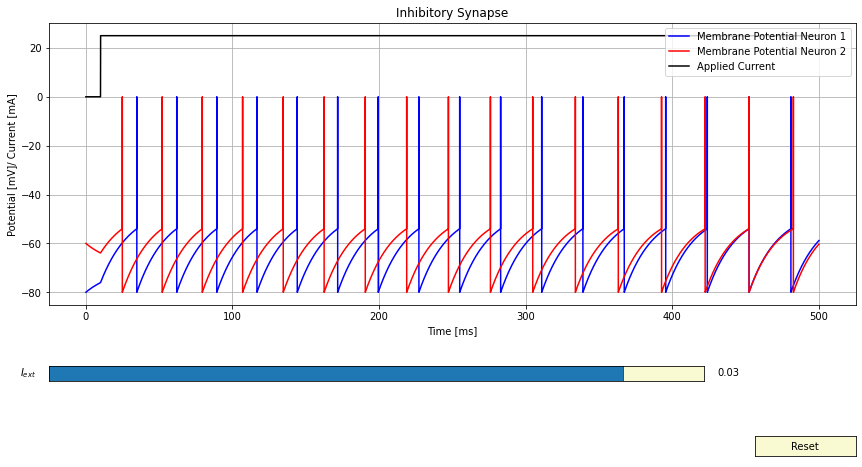

In [ ]:
start_two_neurons_sim(Mode='Inhibitory')

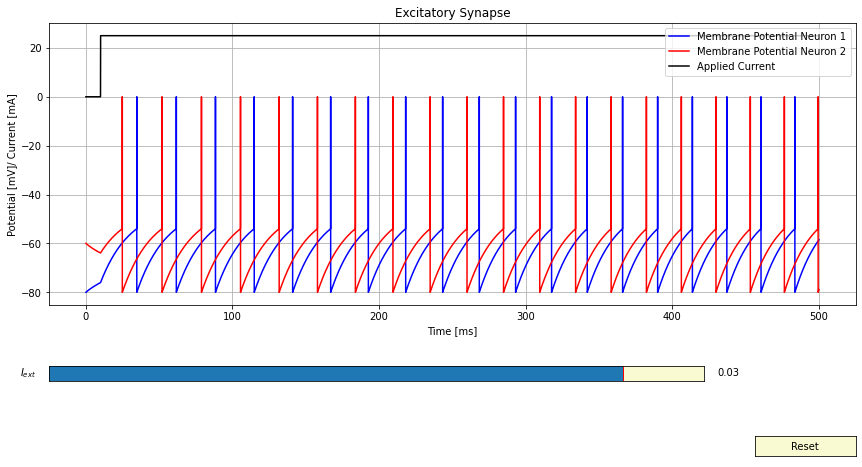

In [9]:

start_two_neurons_sim(Mode='Excitatory')

# **Instability**

In [11]:


#==============================================================================#

def IF(_I=0.025, Es=-0.080):

    ######### Constants
    El1      =   -0.070                      # restint membrane potential [V]
    #El2      =   -0.010                     # restint membrane potential [V]
    thresh  =   -0.054                      # spiking threshold [V]
    tau_m   =    0.020                      
    Rm      =    1                          # I=25 mA and IR=25 mV --> R=1 (Ohms)
    rm      =    0.100
    tau_peak=    0.010
    

    ######### Experimental Setup
    # TIME
    T       =   0.5                          # total simulation length [s]
    dt      =   0.00001                     # step size [s]
    time    =   np.arange(0, T+dt, dt)      # step values [s]
    # VOLTAGE
    V1       =   np.empty(len(time))         # array for saving Voltage history
    V1[0]    =   El1                          # set initial to resting potential
    V2       =   np.empty(len(time))         # array for saving Voltage history
    V2[0]    =   El1                          # set initial to resting potential
    # CURRENT
    I = np.zeros(len(time))
    I[1000:] = _I
    ######### Measurements
    spikes  =   0                           # counter for number of spikes

    ######### Kernel
    k=np.zeros(len(time))
    ######### Impulse Train
    p1=[0]*999
    p1.append(1000)
    p1=p1*int(len(time)/1000)
    if len(p1)<len(time):
      for r in range(0,len(time)-len(p1)):
        p1.append(0)
    p2=[1000,1000]*int(len(time)/2)
    if len(p2)<len(time):
      for r in range(0,len(time)-len(p2)):
        p2.append(0)
    ######### Simulation
    for i in range(1, len(time)):
        t=i*dt
        Kt=(t/tau_peak)*math.exp(1-t/tau_peak)
        k[i]=Kt*dt
        g1=0
        g2=0
        for j in range(0,i):
          g1=g1+p1[j]*k[i-j]
          g2=g2+p2[j]*k[i-j]
    



        # use "dV/dT=(-(V-El)-g(V-Es)rm+IRm)/tau_m" to get this equation
        dV1 =  (Rm*I[i] - (V1[i-1]-El1) - rm*g1*(V1[i-1]-Es))/tau_m
        V1[i] = V1[i-1] + dV1*dt
        dV2 =  (Rm*I[i] - (V2[i-1]-El1) - rm*g2*(V2[i-1]-Es))/tau_m
        V2[i] = V2[i-1] + dV2*dt
       

        # in case we exceed threshold
        if V1[i] > thresh:
            V1[i-1] =  0.000       # set the last step to spike value
            V1[i]   = -0.080       # current step is resting membrane potential
            spikes += 1     # count spike
        if V2[i] > thresh:
            V2[i-1] =  0.000       # set the last step to spike value
            V2[i]   = -0.080       # current step is resting membrane potential
            spikes += 1     # count spike
        

    return V1,V2

def I_values(_I=0.025, time=None):
    I = np.zeros(len(time))
    I[1000:] = _I
    return I

#==============================================================================#

def start_IF_sim(Mode):
    # time parameters for plotting
    T       =   0.5                           # total simulation length [s]
    dt      =   0.00001                       # step size [s]
    time    =   np.arange(0, T+dt, dt)        # step values [s]

    # initial parameters
    I_init      =    0.025
    Es_inh      =   -0.080
    Es_exc      =    0.000
    # Mode
    if Mode=='Inhibitory':
      Es_init=Es_inh
      Title='Inhibitory Synapse'
    if Mode=='Excitatory':
      Es_init=Es_exc
      Title='Excitatory Synapse'

    # update functions for lines
    V1,V2 = IF(_I=I_init, Es=Es_init)
    I = I_values(_I=I_init, time=time)

    ######### Plotting
    axis_color = 'lightgoldenrodyellow'

    fig = plt.figure(Title , figsize=(14, 7))
    ax = fig.add_subplot(111)
    plt.title( Title )
    fig.subplots_adjust(left=0.1, bottom=0.32)

    # plot lines
    line = plt.plot(time*1000, V1*1000,color='b', label="Membrane Potential T1=1000")[0]
    line3= plt.plot(time*1000, V2*1000,color='m', label="Membrane Potential T2=1")[0]
    #line4= plt.plot(time*1000, V3*1000,color='c', label="Membrane Potential (El=-100mv)")[0]

    line2 = plt.plot(time*1000, I*1000,color='r', label="Applied Current")[0]

    # add legend
    plt.legend(loc="upper right")

    # add axis labels
    plt.ylabel("Potential [mV]/ Current [mA]")
    plt.xlabel("Time [ms]")
    plt.grid()

    # define sliders (position, color, inital value, parameter, etc...)
    I_slider_axis = plt.axes([0.1, 0.17, 0.65, 0.03], facecolor=axis_color)
    I_slider = Slider(I_slider_axis, '$I_{ext}$', -0.01, 0.03, valinit=I_init)



    # update functions
    def update(val):
        line.set_ydata(IF(I_slider.val))
        line2.set_ydata(I_values(I_slider.val, time=time))

    # update, if any slider is moved
    I_slider.on_changed(update)

    # Add a button for resetting the parameters
    reset_button_ax = plt.axes([0.8, 0.02, 0.1, 0.04])
    reset_button = Button(
        reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')

    # event of resert button being clicked
    def reset_button_was_clicked(event):
        I_slider.reset()

    reset_button.on_clicked(reset_button_was_clicked)

    plt.show()


#==============================================================================#

#if (__name__ == '__main__'):
#    start_IF_sim()


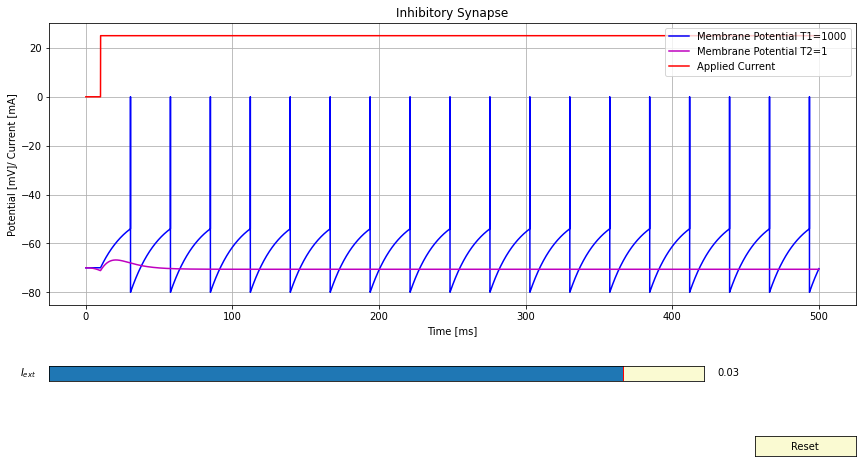

In [12]:
start_IF_sim(Mode='Inhibitory')

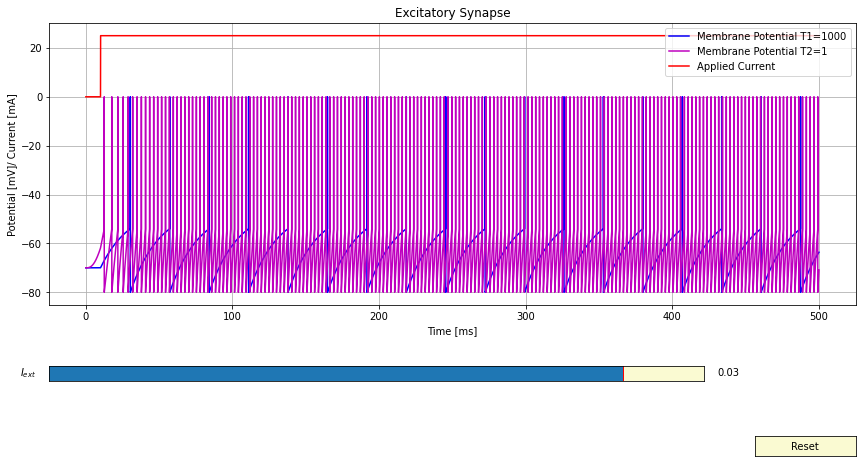

In [13]:
start_IF_sim(Mode='Excitatory')